In [1]:
import tensorflow as tf


In [2]:
print(tf.__version__)

1.14.0


In [3]:
from data_utils import load_tiny_imagenet

In [4]:
from tensorflow import keras

In [5]:
print(keras.__version__)

2.2.4-tf


In [6]:
import numpy as np

In [7]:
import pandas as pd

In [8]:
import matplotlib.pyplot as pyplot

In [9]:
import image

In [10]:
import cv2

In [11]:
import os

In [12]:
scale=5

In [13]:
df=pd.read_csv('words-tiny-dataframe.txt', delimiter="\t", header=None)

In [14]:
flist=os.listdir(df[0][0]+'/images')

In [15]:
print(type(flist))



<class 'list'>


In [42]:
x_train=[]
y_train=np.full(500,df[1][0])
i=1
for img in flist:
    image=cv2.imread(df[0][0]+'/images/'+img)
    image=np.asarray(image)
    x_train.append(image)

    

In [43]:
cdf=pd.DataFrame()

In [44]:
dpath='/home/kartik/'+df[0][0]+'/images/'
print(dpath)

/home/kartik/n02124075/images/


In [45]:
cdf['filename']=flist
cdf['class']=df[1][0]

In [46]:
cdf

,filename,class
0,n02124075_194.JPEG,Egyptian cat
1,n02124075_45.JPEG,Egyptian cat
2,n02124075_233.JPEG,Egyptian cat
3,n02124075_47.JPEG,Egyptian cat
4,n02124075_79.JPEG,Egyptian cat
...,...,...
495,n02124075_44.JPEG,Egyptian cat
496,n02124075_371.JPEG,Egyptian cat
497,n02124075_284.JPEG,Egyptian cat
498,n02124075_415.JPEG,Egyptian cat


In [47]:
x_train=np.array(x_train)


In [48]:
y_train=np.array(y_train)

In [49]:
df[1][0]

'Egyptian cat'

In [50]:
datagen=keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                     horizontal_flip=True,
                                                     vertical_flip=True)

In [51]:
x_train=x_train.reshape((x_train.shape[0],64,64,3))

In [52]:
wres=scale*x_train.shape[2]
hres=scale*x_train.shape[1]
npic=x_train.shape[0]
nchan=x_train.shape[3]

In [53]:
x_train_aug=np.full((npic,wres,hres,nchan),0)

In [54]:
for i in range(0,(x_train.shape[0])):
    pic=x_train[i]
    pic=cv2.resize(pic,(wres,hres),interpolation=cv2.INTER_AREA)
    pic=np.expand_dims(pic, axis=2)
    pic=cv2.cvtColor(pic,cv2.COLOR_GRAY2RGB)
    x_train_aug[i]=pic
               

In [59]:
datagen.fit(x_train)

In [30]:
os.makedirs('images')

Found 500 images belonging to 1 classes.


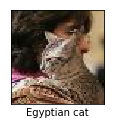

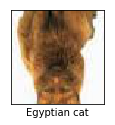

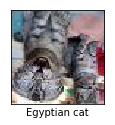

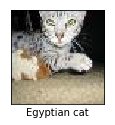

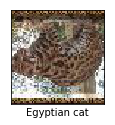

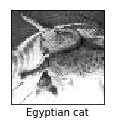

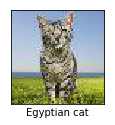

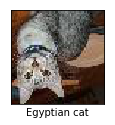

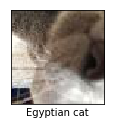

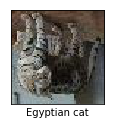

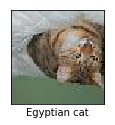

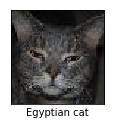

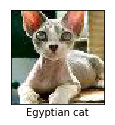

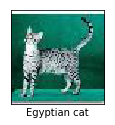

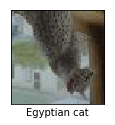

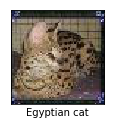

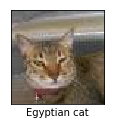

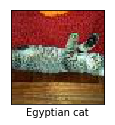

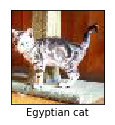

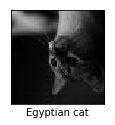

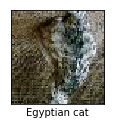

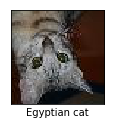

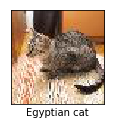

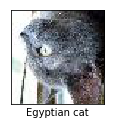

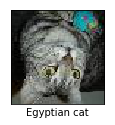

In [60]:
for x_batch, y_batch in datagen.flow_from_dataframe(cdf,
                                                    directory=dpath,
                                                    x_col="filename",
                                                    y_col="class",
                                                    class_mode='binary',
                                                    batch_size=25,
                                                    save_to_dir='images',
                                                    target_size=(hres,wres),
                                                    save_prefix='aug',
                                                    save_format='png'):
    
    for i in range(25):
        pyplot.figure(figsize=(10,10))
        pyplot.subplot(5,5,i+1)
        pyplot.xticks([])
        pyplot.yticks([])
        pyplot.grid=(False)
        pyplot.imshow(x_batch[i], cmap=pyplot.cm.binary)
        pyplot.xlabel(y_train[i])
        if i == 25:
            print(i)
            break
    break
        

In [32]:
x_batch.shape


(9, 320, 320, 3)